# Linear Regression using R and ggplot
* Carrier out linear regression analysis on IRIS data Set
* Filter out the Virginica species only and performed analysis on that.

## Importants links
* http://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/r/iris_lm/
* https://www.r-bloggers.com/r-tutorial-series-simple-linear-regression/
* https://susanejohnston.wordpress.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/
* https://rstudio-pubs-static.s3.amazonaws.com/204918_d5ccf842cbc540e78b3d6d3287e6ad38.html
* http://www.cyclismo.org/tutorial/R/linearLeastSquares.html

In [1]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [6]:
library(dplyr)
virginica <- filter(iris, Species == "virginica")
head(virginica) 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
6.3,3.3,6.0,2.5,virginica
5.8,2.7,5.1,1.9,virginica
7.1,3.0,5.9,2.1,virginica
6.3,2.9,5.6,1.8,virginica
6.5,3.0,5.8,2.2,virginica
7.6,3.0,6.6,2.1,virginica


In [7]:
fit1 <- lm(Sepal.Length ~ Petal.Width, data = virginica)
summary(fit1)


Call:
lm(formula = Sepal.Length ~ Petal.Width, data = virginica)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47583 -0.33100 -0.07583  0.26265  1.32892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2694     0.6556   8.038 1.93e-10 ***
Petal.Width   0.6508     0.3207   2.029    0.048 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6166 on 48 degrees of freedom
Multiple R-squared:  0.07902,	Adjusted R-squared:  0.05983 
F-statistic: 4.118 on 1 and 48 DF,  p-value: 0.04798


In [32]:
signif(summary(fit1)$coef,5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.26940,0.65556,8.0380,1.9296e-10
Petal.Width,0.65083,0.32070,2.0294,4.7981e-02


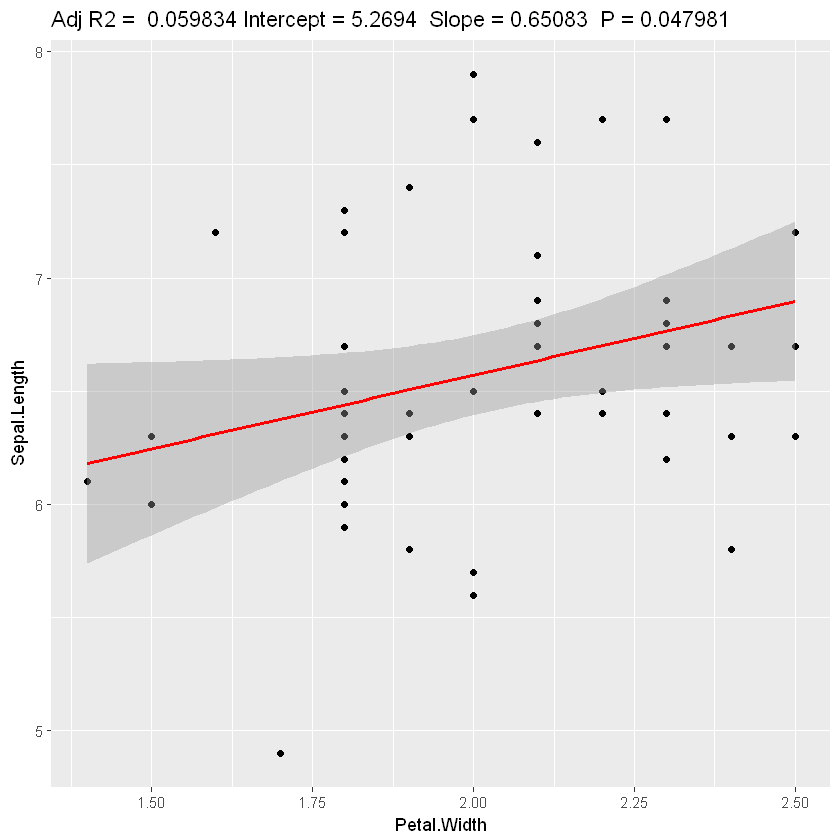

In [24]:
library(ggplot2)
ggplot(virginica, aes(x = Petal.Width, y = Sepal.Length)) + geom_point() +stat_smooth(method = "lm", col = "red") + 
       labs(title = paste("Adj R2 = ",signif(summary(fit1)$adj.r.squared, 5),
                          "Intercept =",signif(fit1$coef[[1]],5 ),
                          " Slope =",signif(fit1$coef[[2]], 5),
                          " P =",signif(summary(fit1)$coef[2,4], 5)))